In [181]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_students = pd.DataFrame(
    {
        "Name":      ["顾舒扬", "周全",   "余金珂", "张钰婷", "吕行",   "魏宇涵", "胡晟昊", "蔡熠",   "杨彭武", "卢玉", "李晓涛", "尹鹏翔", "任康妮",  "岩叫",  "陈禹彤", "姜春阳", "林丹妮", "李齐力", "李良瑞", "任昶旭", "王盈怡", "连思强", "连军瑜", "张宇航", "刘明岳", "牟兵",  "李世鑫", "邓灿",   "陈鑫",   "杨玲坪", "奚剑波", "蒋志颖", "李毓梁", "陈龙", "涂世彤",  "刘可一",  "娜海",   "聂梦婷", "赵秋月"],
        "Gender":    ["boy",   "boy",    "boy",   "girl",   "boy",    "boy",    "boy",   "boy",   "boy",    "boy", "boy",    "boy",   "girl",    "boy",   "girl",  "boy",    "girl",  "boy",   "boy",    "boy",   "girl",   "girl",  "girl",   "boy",   "boy",   "boy",   "boy",    "boy",   "boy",    "boy",    "boy",   "girl",  "boy",    "boy", "girl",   "boy",     "girl",   "girl",   "girl"],
        "Longitude": [120.270,  103.765,  103.765,  102.195, 103.130,  118.265, 110.453,  119.008, 102.850, 103.795, 120.270, 118.250,  111.144,  100.417, 118.526,  116.170, 120.437,  113.450, 103.400,  119.107, 110.128,  118.680, 118.370, 106.917,  116.170, 105.148, 103.680, 115.950,  114.870,  100.212, 106.550,  100.212, 103.717, 103.800, 103.707,  113.650,  100.450,  106.330, 105.450],
        "Latitude":  [30.188,   29.552,   29.552,   38.526,  23.030,   24.264,  31.133,   24.146,  24.827,  25.496,  30.188,  35.416,   37.518,   21.450,  42.152,   41.120,  27.725,   30.336,  30.540,   36.709,  27.457,   25.370,  24.540,  29.570 ,  41.120,  28.438,  27.370,  30.076,   30.440,   25.613,  25.613,   25.613,  27.338,  25.50,   27.320,   34.800,   22.400,   29.350,  23.560],
        "Elevation": [10,       320,      320,      1400,    1307,     165,     302,      24,      2008,    2000,    10,      27,       1161,     552.7,   320,      2000,    119,      21.5,    594,      23,      170,      78,      301,     237,      2000,    649,     1685,    39,       90,       2019,    238,      2019,    1685,    2000,    1685,     108,      2350,     221,     750],
    }
)
df_students.head()


,Name,Gender,Longitude,Latitude,Elevation
0,顾舒扬,boy,120.270,30.188,10.0
1,周全,boy,103.765,29.552,320.0
2,余金珂,boy,103.765,29.552,320.0
3,张钰婷,girl,102.195,38.526,1400.0
4,吕行,boy,103.130,23.030,1307.0


In [173]:
path_china = 'data/GaryBikini-ChinaAdminDivisonSHP/2_Province/Province.shp'
china = gpd.read_file(path_china)
china.head()

,pr_adcode,pr_name,cn_adcode,cn_name,geometry
0,110000,北京市,100000,中华人民共和国,"POLYGON ((116.77565 40.02168, 116.77456 40.019..."
1,120000,天津市,100000,中华人民共和国,"POLYGON ((117.84713 39.40774, 117.84725 39.407..."
2,130000,河北省,100000,中华人民共和国,"MULTIPOLYGON (((118.27675 38.98087, 118.27262 ..."
3,140000,山西省,100000,中华人民共和国,"POLYGON ((110.61098 34.60730, 110.59450 34.603..."
4,150000,内蒙古自治区,100000,中华人民共和国,"POLYGON ((124.52522 48.14594, 124.52310 48.145..."


In [174]:
stat_ls = []
for i in range(df_students.shape[0]):
    point = Point(df_students[['Longitude', 'Latitude']].loc[i,:])
    stat = point.within(china['geometry'])
    stat_ls.append(list(stat))
stat_province = np.array(stat_ls)
stat_province = stat_province.sum(axis=0)
### Add a new column.
china['Num. of students'] = stat_province

In [175]:
china.head()


,pr_adcode,pr_name,cn_adcode,cn_name,geometry,Num. of students
0,110000,北京市,100000,中华人民共和国,"POLYGON ((116.77565 40.02168, 116.77456 40.019...",0
1,120000,天津市,100000,中华人民共和国,"POLYGON ((117.84713 39.40774, 117.84725 39.407...",0
2,130000,河北省,100000,中华人民共和国,"MULTIPOLYGON (((118.27675 38.98087, 118.27262 ...",2
3,140000,山西省,100000,中华人民共和国,"POLYGON ((110.61098 34.60730, 110.59450 34.603...",1
4,150000,内蒙古自治区,100000,中华人民共和国,"POLYGON ((124.52522 48.14594, 124.52310 48.145...",1


In [7]:
ids_boy = np.where(df_students['Gender']=='boy')[0]
ids_girl = np.where(df_students['Gender']=='girl')[0]


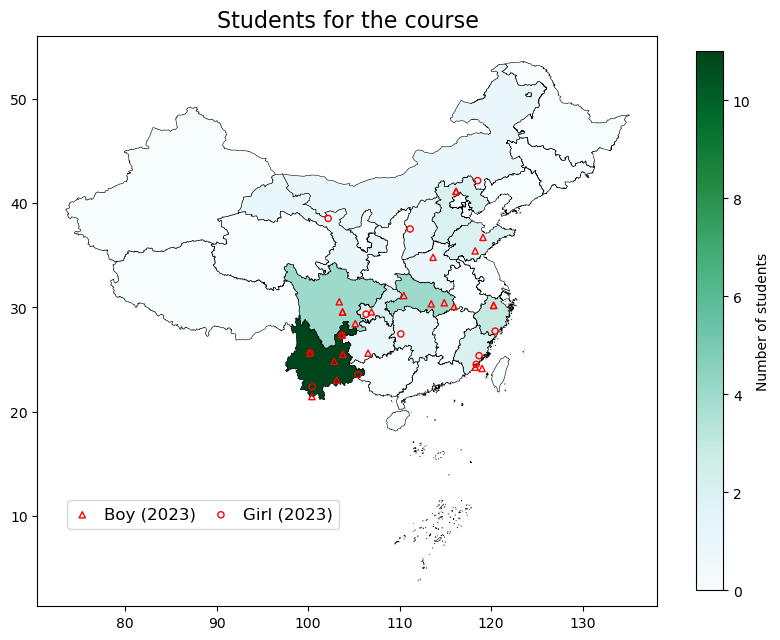

In [192]:
# fig, ax = plt.subplots(figsize=(8,8))
# china.geometry.plot(ax=ax, color='azure', edgecolor='black', linewidth=0.4)
fig, ax = plt.subplots(figsize=(10,10))
china.plot(ax=ax, column='Num. of students', cmap='BuGn', edgecolor='black', \
           legend=True, linewidth=0.4, legend_kwds={'label': 'Number of students', 'shrink':0.7})
ax.scatter(df_students['Longitude'][ids_boy], df_students['Latitude'][ids_boy], s=20,color='red', marker="^", facecolors='none', label='Boy (2023)')
ax.scatter(df_students['Longitude'][ids_girl], df_students['Latitude'][ids_girl], s=20, color='red', marker="o", facecolors='none', label='Girl (2023)')
ax.set_title('Students for the course', fontsize=16)
ax.legend(bbox_to_anchor=(0.5, 0.2), handlelength=1, \
                columnspacing=1, fontsize='large', ncols=2)
